# Create bar plot for proposed and as-built quantities

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [199]:
csv = r"C:\Users\Daniel.Aragon\Desktop\TEMP\TO2\Qty_deltas.csv"
df = pd.read_csv(csv)
df.head()

,INDEX ITEM NO.,ITEM DESCRIPTION,UNIT,Proposed Quantities,Actual Quantities
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,201-00001,Clearing and Grubbing,ACRE,1.392470,0.974729
3,202-00010,Removal of Tree,LS,1.000000,0.700000
4,203-00041,Unclassified Excavation (Complete in Place),CY,3096.759259,2167.731481


In [200]:
df = df.dropna().reset_index(drop=True)
df.head()

,INDEX ITEM NO.,ITEM DESCRIPTION,UNIT,Proposed Quantities,Actual Quantities
0,201-00001,Clearing and Grubbing,ACRE,1.392470,0.974729
1,202-00010,Removal of Tree,LS,1.000000,0.700000
2,203-00041,Unclassified Excavation (Complete in Place),CY,3096.759259,2167.731481
3,203-00042,Stream and Floodplain Grading (Final),HR,129.031623,90.322136
4,208-00400,Water Control,LS,1.000000,0.700000


In [205]:
df['pct change'] = ((df['Actual Quantities']-df['Proposed Quantities'])/df['Proposed Quantities'])*100

df.head()

,INDEX ITEM NO.,ITEM DESCRIPTION,UNIT,Proposed Quantities,Actual Quantities,pct change
0,201-00001,Clearing and Grubbing,ACRE,1.392470,0.974729,-30.0
1,202-00010,Removal of Tree,LS,1.000000,0.700000,-30.0
2,203-00041,Unclassified Excavation (Complete in Place),CY,3096.759259,2167.731481,-30.0
3,203-00042,Stream and Floodplain Grading (Final),HR,129.031623,90.322136,-30.0
4,208-00400,Water Control,LS,1.000000,0.700000,-30.0


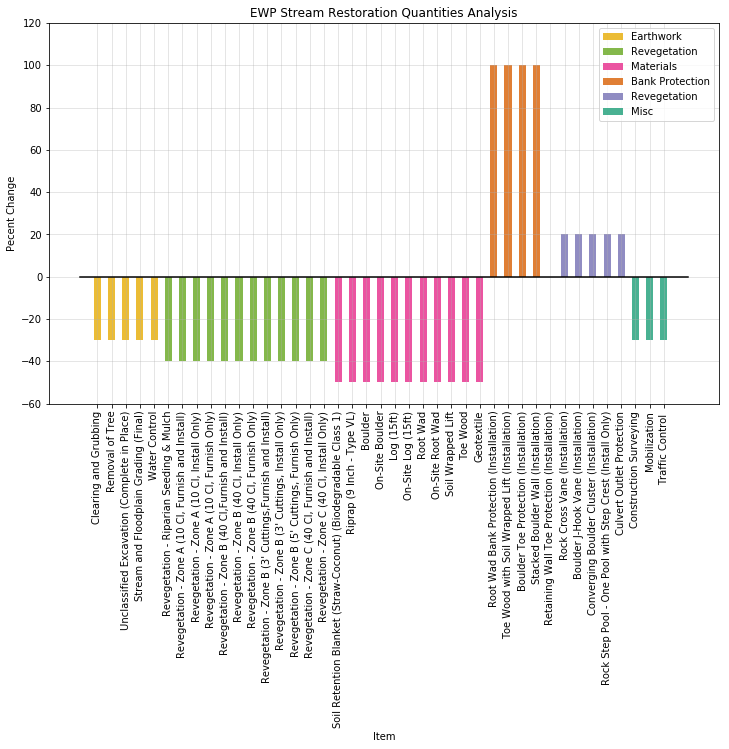

In [245]:
# Set up the figure

# Close any existing plots
plt.close()

# Initiate
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)

# Set index ranges (for x dimension) for each category
earthwork       = df['ITEM DESCRIPTION'].iloc[:5]
reveg           = df['ITEM DESCRIPTION'].iloc[5:17]
materials       = df['ITEM DESCRIPTION'].iloc[17:28]
bank_protection = df['ITEM DESCRIPTION'].iloc[28:31]
in_stream_strct = df['ITEM DESCRIPTION'].iloc[31:36]
misc            = df['ITEM DESCRIPTION'].iloc[36:]

# Set an all encompassing index range
index = np.arange(len(df['ITEM DESCRIPTION']))

# Set category index ranges
index_earthwork       = np.arange(5)
index_reveg           = np.arange(5,17)
index_materials       = np.arange(17,28)
index_bank_protection = np.arange(28,32)
index_in_stream_strct = np.arange(32,38)
index_misc            = np.arange(38,41)

# Plot parameters
bar_width = .5
opacity = 0.8
y_bottom = df['pct change'].min() * 1.2
y_top    = df['pct change'].max() * 1.2

# Add bars, one category at a time with unique colors
bars_earthwork = ax.bar(index_earthwork + 0.5*bar_width, df['pct change'].iloc[:5], bar_width, 
                        alpha=opacity, color='#e6ab02',
                        label='Earthwork')

bars_reveg = ax.bar(index_reveg + 0.5*bar_width, df['pct change'].iloc[5:17], bar_width,
                    alpha=opacity, color='#66a61e',
                    label='Revegetation')

bars_materials = ax.bar(index_materials + 0.5*bar_width, df['pct change'].iloc[17:28], bar_width,
                        alpha=opacity, color='#e7298a',
                        label='Materials')

bars_bank_protection = ax.bar(index_bank_protection + 0.5*bar_width, df['pct change'].iloc[28:32], bar_width,
                              alpha=opacity, color='#d95f02',
                              label='Bank Protection')

bars_in_stream_strct = ax.bar(index_in_stream_strct + 0.5*bar_width, df['pct change'].iloc[32:38], bar_width, 
                              alpha=opacity, color='#7570b3',
                              label='Revegetation')

bars_misc = ax.bar(index_misc + 0.5*bar_width, df['pct change'].iloc[38:], bar_width, 
                   alpha=opacity, color='#1b9e77',
                   label='Misc')

# axes parameters
ax.set_xlabel('Item')
ax.set_ylabel('Pecent Change')
ax.set_title('EWP Stream Restoration Quantities Analysis')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['ITEM DESCRIPTION'],  rotation='vertical')

ax.set_ylim(bottom=y_bottom, top=y_top)

ax.legend()

ax.grid(b=None, which='major', axis='both', alpha=0.4)

# Add horizontal bar at 0% change
x = [-1,42]
y = [0,0]
no_change = ax.plot(x,y, color='k')

# Show
plt.show()


In [243]:
# save figure
fig.savefig('qtys.png', bbox_inches='tight')
plt.close()